In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:, 1:-1].values
y = df.iloc[:,-1].values
y = y.reshape(len(y), 1)

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
ssX = StandardScaler()
ssy = StandardScaler()
X = ssX.fit_transform(X)
y = ssy.fit_transform(y)

In [4]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [5]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(X,y)

/opt/anaconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [6]:
ssy.inverse_transform(svr.predict(ssX.transform([[6.5]])))

array([170370.0204065])

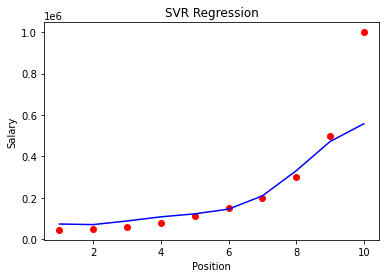

In [7]:
plt.scatter(ssX.inverse_transform(X),ssy.inverse_transform(y), color="red")
plt.plot(ssX.inverse_transform(X),ssy.inverse_transform(svr.predict(X)), color="blue")
plt.title("SVR Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

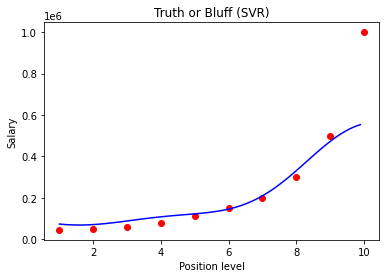

In [8]:
X_grid = np.arange(min(ssX.inverse_transform(X)), max(ssX.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(ssX.inverse_transform(X), ssy.inverse_transform(y), color = 'red')
plt.plot(X_grid, ssy.inverse_transform(svr.predict(ssX.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()